In [5]:
from keras.datasets import imdb
from keras import models, layers, regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

In [6]:
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

In [7]:
# word_index - словарь, отображающий слова в целочисленные индексы
word_index = imdb.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_index.items())
decoded_review = ' '.join((reverse_word_index.get(i - 3, '?') for i in train_data[0]))

print(decoded_review.replace('?', '\n'))


 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert 
 is an amazing actor and now the same being director 
 father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for 
 and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also 
 to the two little boy's that played the 
 of norman and paul they were just brilliant children are often left out of the 
 list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [8]:
# Прямое кодирование списков в векторы нулей и единиц
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Создание проверочного набора
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
callbacks = [ 
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1)
]
model = models.Sequential([
    layers.Dense(16,
                 activation='relu', 
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(num_words,)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(16, 
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                   callbacks=callbacks)

Epoch 1/20
118/118 [==============================] - 3s 11ms/step - loss: 0.6765 - accuracy: 0.6797 - val_loss: 0.5396 - val_accuracy: 0.8623 - lr: 0.0010
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.4314 - accuracy: 0.8287 - val_loss: 0.3890 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 3/20
118/118 [==============================] - 1s 6ms/step - loss: 0.3418 - accuracy: 0.8848 - val_loss: 0.3321 - val_accuracy: 0.8843 - lr: 0.0010
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2944 - accuracy: 0.9089 - val_loss: 0.3575 - val_accuracy: 0.8764 - lr: 0.0010
Epoch 5/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2565 - accuracy: 0.9275 - val_loss: 0.3482 - val_accuracy: 0.8823 - lr: 5.0000e-04


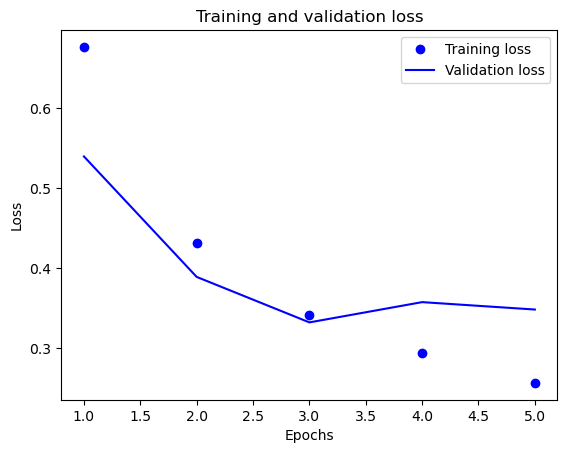

In [16]:
'''Формирование графиков потерь на этапах обучения и проверки'''
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

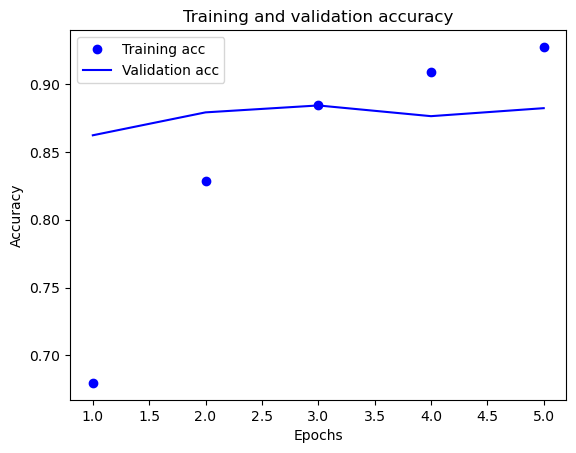

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
result = model.evaluate(x_test, y_test)
print(result)

782/782 [==============================] - 18s 22ms/step - loss: 0.3485 - accuracy: 0.8784
[0.3485146760940552, 0.8783599734306335]
